In [15]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV



df= pd.read_csv('D:/Etudes/4EME/4MLSP/heart-disease/diamonds.csv')
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

C:\Users\celso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

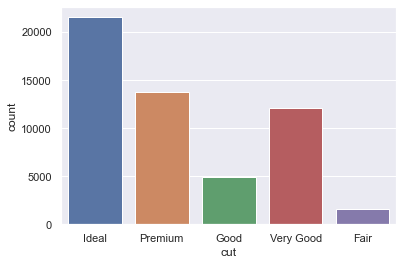

In [5]:
sns.set(font_scale=1)
sns.countplot(df["cut"])

In [6]:
df[["price","carat","depth","table","x","y","z"]].corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.010647,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.127134,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


<AxesSubplot:>

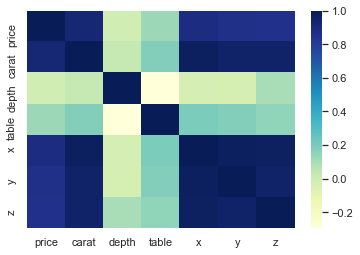

In [7]:
sns.heatmap(df[["price","carat","depth","table","x","y","z"]].corr(),cmap="YlGnBu")

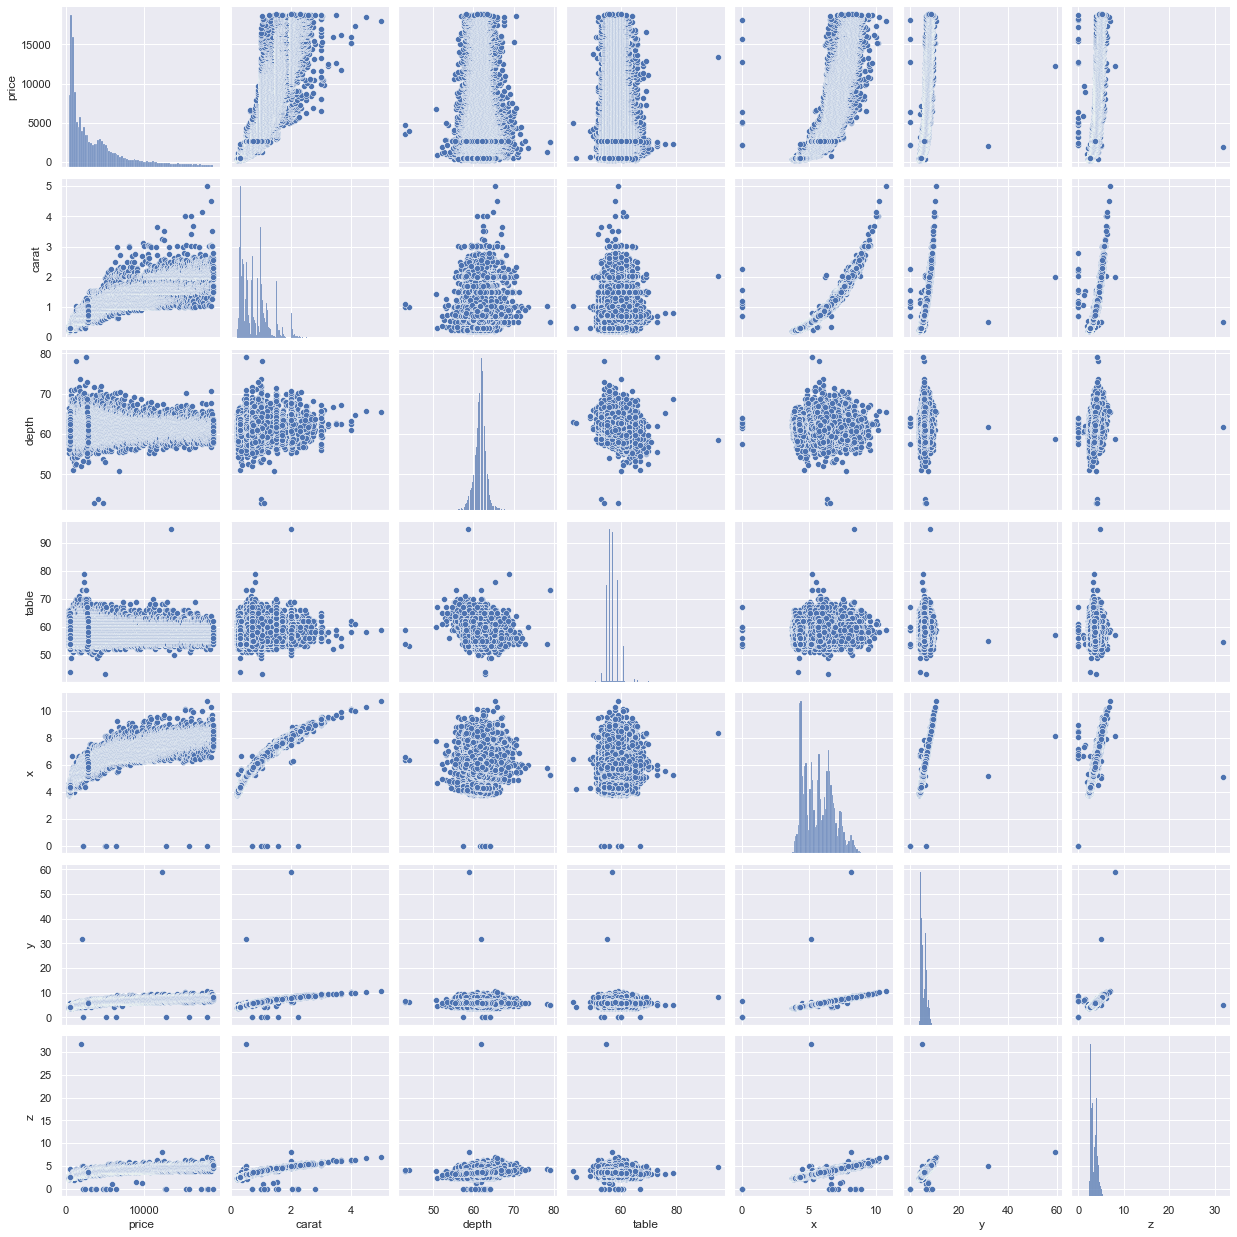

In [8]:
sns.pairplot(df[["price","carat","depth","table","x","y","z"]]); 

# Data split

In [39]:
from sklearn.model_selection import train_test_split

data_y = df['price']
data_x = df.drop(['price'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.33)

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Pipelines preprocessing 

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

qual_var = ['cut','color','clarity']
quant_var = ['carat','x','y','z']
to_remove = ['Unnamed: 0','depth','table']

qual_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(drop = 'first'))
])

quant_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('min_max_scaler', MinMaxScaler())
])
 
preprocessor = ColumnTransformer(remainder='passthrough',
                                 transformers=[
                                   ('tr_quant',quant_pipeline, quant_var),
                                    ('tr_qual',qual_pipeline,qual_var),
                                     ('remove', 'drop', to_remove)
                                 ])

# Model Pipeline 

In [41]:
from sklearn.linear_model import LinearRegression

linear_R = Pipeline(steps=[("preprocess",preprocessor),
                 ("l_Reg",LinearRegression())])

In [42]:
linearR_grid = GridSearchCV(linear_R,{},cv = 3).fit(x_train,y_train)

In [43]:
linearR_grid.best_estimator_.score(x_test,y_test)

0.916858910656962

In [44]:
linearR_grid.best_estimator_.score(x_train,y_train)

0.9207081237629952

In [46]:
linearR_grid.score(x_test,y_test)

0.916858910656962

# K-Neighbors Regressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

KNN_Regressor = Pipeline(steps=[("preprocess",preprocessor),
                 ("KNN_Reg",KNeighborsRegressor(n_jobs=-1))])
KNN_R_HP = {'KNN_Reg__n_neighbors':[3,5,7,9],'KNN_Reg__weights':['uniform', 'distance'],'KNN_Reg__algorithm':['auto','brute','ball_tree','kd_tree'],'KNN_Reg__p':[1,2]} 

In [58]:
KNNR_grid = GridSearchCV(KNN_Regressor,KNN_R_HP,cv = 3,scoring='r2').fit(x_train,y_train)

In [57]:
KNNR_grid.score(x_test,y_test)

0.9682681927591807

In [54]:
KNNR_grid.best_params_

{'KNN_Reg__algorithm': 'brute',
 'KNN_Reg__n_neighbors': 3,
 'KNN_Reg__p': 1,
 'KNN_Reg__weights': 'distance'}

# Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

DTree_Regressor = Pipeline(steps=[("preprocess",preprocessor),
                 ("DTree",DecisionTreeRegressor())])
DTree_R_HP = {'DTree__criterion':['mse', 'friedman_mse', 'mae'],'DTree__splitter':['best', 'random']} 

In [65]:
DTree_R_grid = GridSearchCV(DTree_Regressor,DTree_R_HP,cv = 3,scoring='r2').fit(x_train,y_train)

In [67]:
DTree_R_grid.score(x_test,y_test) 

0.9622144354838793